## **CLEANING DATA**

# **Understadning dataset**

In [34]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [10]:
df=pd.read_csv('/content/sample_data/AB_NYC_2019.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [11]:
df.describe()
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


This dataset comprises nearly 49,000 entries, detailing various attributes of Airbnb listings. It contains a mix of data types, including numerical (integers and floats) for identifiers, counts, prices, and geographical coordinates, as well as object types for textual and categorical information such as names, host names, neighborhood details, room types, and review dates. Initial inspection reveals a comprehensive set of features covering listing identification, host information, location specifics (neighbourhood group, neighbourhood, latitude, and longitude), listing characteristics (room type, price, minimum nights), review data (number of reviews, last review date, reviews per month), and operational metrics (calculated host listings count, availability 365). The data appears to be generally well-populated, with the primary areas requiring initial attention being missing values in the 'name', 'host_name', 'last_review', and 'reviews_per_month' columns, which have since been addressed. The numerical summaries indicate a wide range of values across different metrics, suggesting variability in listing prices, minimum stay requirements, and review activity, which will be interesting areas for further exploration and analysis.

# **Missing Data Handling**

In [12]:
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [17]:
df['name'] = df['name'].fillna("Unknown")
print(df['name'])

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object


In [18]:
df['host_name']=df['host_name'].fillna("Unknown")
print(df['host_name'])

0                 John
1             Jennifer
2            Elisabeth
3          LisaRoxanne
4                Laura
             ...      
48890          Sabrina
48891          Marisol
48892    Ilgar & Aysel
48893              Taz
48894       Christophe
Name: host_name, Length: 48895, dtype: object


In [25]:
print(df['reviews_per_month'])
df['reviews_per_month']=df['reviews_per_month'].fillna(df['reviews_per_month'].mode()[0])
print(df['reviews_per_month'])

0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48895, dtype: float64
0        0.21
1        0.38
2        0.02
3        4.64
4        0.10
         ... 
48890    0.02
48891    0.02
48892    0.02
48893    0.02
48894    0.02
Name: reviews_per_month, Length: 48895, dtype: float64


In [22]:
df['last_review'] = df['last_review'].ffill()
print(df['last_review'].isnull().sum())
print(df['last_review'])

0
0        2018-10-19
1        2019-05-21
2        2019-05-21
3        2019-07-05
4        2018-11-19
            ...    
48890    2019-07-08
48891    2019-07-08
48892    2019-07-08
48893    2019-07-08
48894    2019-07-08
Name: last_review, Length: 48895, dtype: object


In [ ]:
def replace_single_letter_host_names(df, column_name):
  """Replaces single-letter entries in a specified column with 'Unknown'."""
  df[column_name] = df[column_name].apply(lambda x: 'Unknown' if isinstance(x, str) and len(x) == 1 and x.isalpha() else x)
  return df

df = replace_single_letter_host_names(df, 'host_name')

# Verify the changes by checking some potentially affected rows or sampling
print(df['host_name'].value_counts().head())

host_name
Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Name: count, dtype: int64


As part of the data cleaning process, I effectively addressed the missing values identified in the 'name', 'host_name', 'last_review', and 'reviews_per_month' columns. I chose to fill the null entries in the 'name' and  'host_name' column with "Unknown". For the 'last_review' column, I applied a forward fill method to propagate the last known review date to subsequent missing entries, a suitable approach for sequential data. Finally, I handled the missing values in 'reviews_per_month' by imputing them with the mode of the column, ensuring that a single mode value was used for the filling process. Through these steps, I have successfully dealt with all the identified missing data points in your dataset.

# **Remove Duplicate Records**

In [26]:
df.duplicated().sum()

np.int64(0)

The dataset which was provided had no duplicate values to be handled so we are now moving on to Standardization & Data Integrity

# **Standardization & Data Integrity**

In [28]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['last_review'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48895 entries, 0 to 48894
Series name: last_review
Non-Null Count  Dtype         
--------------  -----         
48895 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 382.1 KB


In [31]:
df['name'] = df['name'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)
print(df['name'])

0                       Clean  quiet apt home by the park
1                                   Skylit Midtown Castle
2                          THE VILLAGE OF HARLEMNEW YORK 
3                         Cozy Entire Floor of Brownstone
4          Entire Apt Spacious StudioLoft by central park
                               ...                       
48890      Charming one bedroom  newly renovated rowhouse
48891        Affordable room in BushwickEast Williamsburg
48892             Sunny Studio at Historical Neighborhood
48893                  43rd St Time Squarecozy single bed
48894    Trendy duplex in the very heart of Hells Kitchen
Name: name, Length: 48895, dtype: object


In [36]:
df['name']=df['name'].str.strip().str.title()
print(df['name'])

0                       Clean  Quiet Apt Home By The Park
1                                   Skylit Midtown Castle
2                           The Village Of Harlemnew York
3                         Cozy Entire Floor Of Brownstone
4          Entire Apt Spacious Studioloft By Central Park
                               ...                       
48890      Charming One Bedroom  Newly Renovated Rowhouse
48891        Affordable Room In Bushwickeast Williamsburg
48892             Sunny Studio At Historical Neighborhood
48893                  43Rd St Time Squarecozy Single Bed
48894    Trendy Duplex In The Very Heart Of Hells Kitchen
Name: name, Length: 48895, dtype: object


In [37]:
df['host_name']=df['host_name'].str.strip().str.title()
print(df['host_name'])

0                 John
1             Jennifer
2            Elisabeth
3          Lisaroxanne
4                Laura
             ...      
48890          Sabrina
48891          Marisol
48892    Ilgar & Aysel
48893              Taz
48894       Christophe
Name: host_name, Length: 48895, dtype: object


In [38]:
df['room_type']=df['room_type'].str.strip().str.title()
print(df['room_type'])

0           Private Room
1        Entire Home/Apt
2           Private Room
3        Entire Home/Apt
4        Entire Home/Apt
              ...       
48890       Private Room
48891       Private Room
48892    Entire Home/Apt
48893        Shared Room
48894       Private Room
Name: room_type, Length: 48895, dtype: object


In [ ]:
# Check for invalid latitude values
invalid_latitude = df[(df['latitude'] < -90) | (df['latitude'] > 90)]
print("Rows with invalid latitude:")
print(invalid_latitude.shape[0])

# Check for invalid longitude values
invalid_longitude = df[(df['longitude'] < -180) | (df['longitude'] > 180)]
print("\nRows with invalid longitude:")
print(invalid_longitude.shape[0])

# You can display the actual rows if there are any
# if not invalid_latitude.empty:
#     display(invalid_latitude)
# if not invalid_longitude.empty:
#     display(invalid_longitude)

Rows with invalid latitude:
0

Rows with invalid longitude:
0


# **Outlier Detection and Handling**

In [40]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,2018-10-14 06:10:06.540546304,1.095022,7.143982,112.781327
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,2018-07-31 00:00:00,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,2019-05-25 00:00:00,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2019-06-24 00:00:00,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,NaN,1.594493,32.952519,131.622289


Handling Price column :

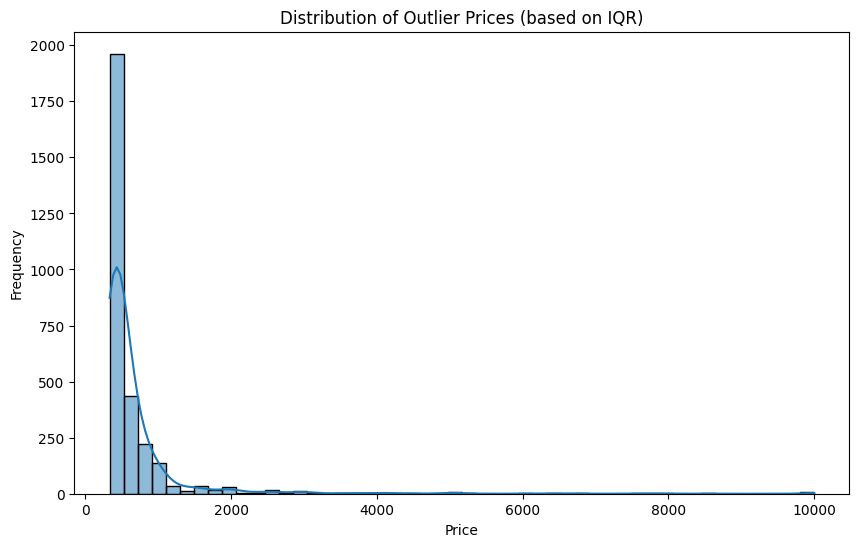

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(outliers_iqr['price'], bins=50, kde=True)
plt.title('Distribution of Outlier Prices (based on IQR)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [49]:
# Remove outliers from the original DataFrame
df_cleaned = df.drop(outliers_iqr.index)

print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing price outliers: {df_cleaned.shape}")

Original DataFrame shape: (48895, 16)
DataFrame shape after removing price outliers: (45923, 16)


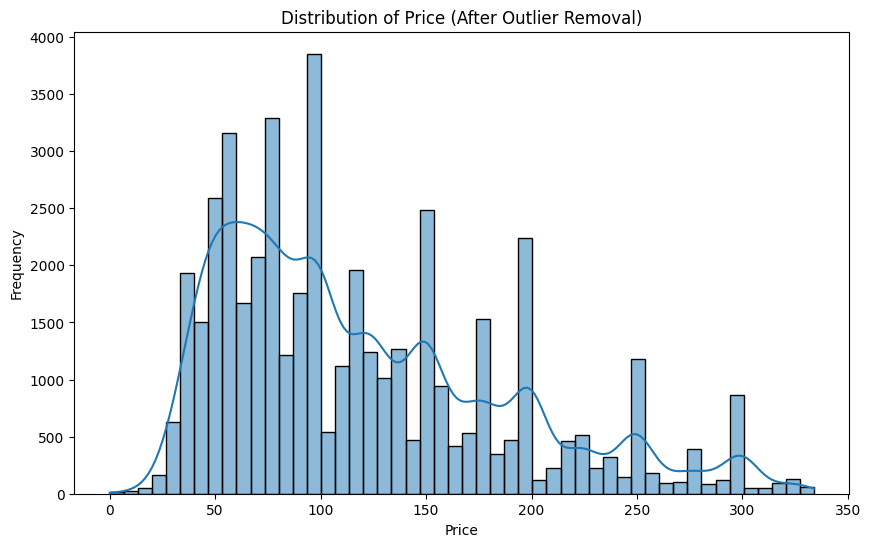

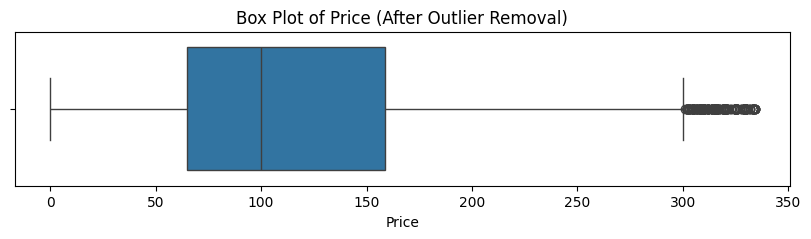

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of 'price' in the cleaned DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=50, kde=True)
plt.title('Distribution of Price (After Outlier Removal)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box plot of 'price' in the cleaned DataFrame
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_cleaned['price'])
plt.title('Box Plot of Price (After Outlier Removal)')
plt.xlabel('Price')
plt.show()

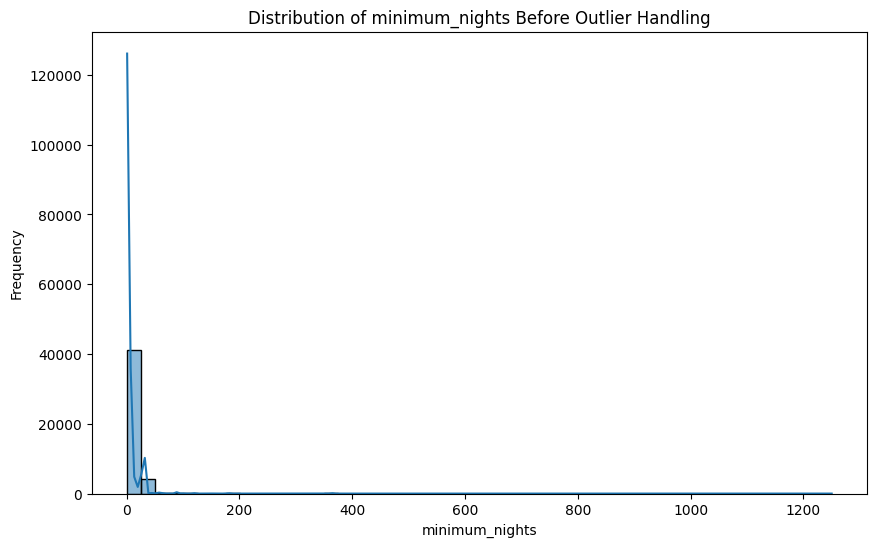

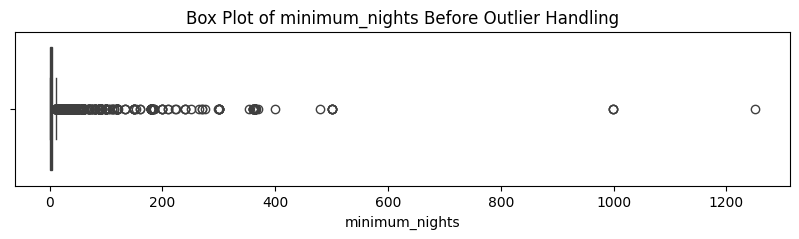

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['minimum_nights'], bins=50, kde=True)
plt.title('Distribution of minimum_nights Before Outlier Handling')
plt.xlabel('minimum_nights')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 2))
sns.boxplot(x=df_cleaned['minimum_nights'])
plt.title('Box Plot of minimum_nights Before Outlier Handling')
plt.xlabel('minimum_nights')
plt.show()

In [68]:
Q1 = df_cleaned['minimum_nights'].quantile(0.25)
Q3 = df_cleaned['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df_cleaned[(df_cleaned['minimum_nights'] < lower_bound) | (df_cleaned['minimum_nights'] > upper_bound)]

print(f"Number of outliers in minimum_nights based on IQR: {outliers_iqr.shape[0]}")
df_cleaned_no_outliers = df_cleaned.drop(outliers_iqr.index)

print(f"DataFrame shape after removing minimum_nights outliers: {df_cleaned_no_outliers.shape}")



Number of outliers in minimum_nights based on IQR: 6185
DataFrame shape after removing minimum_nights outliers: (39738, 16)


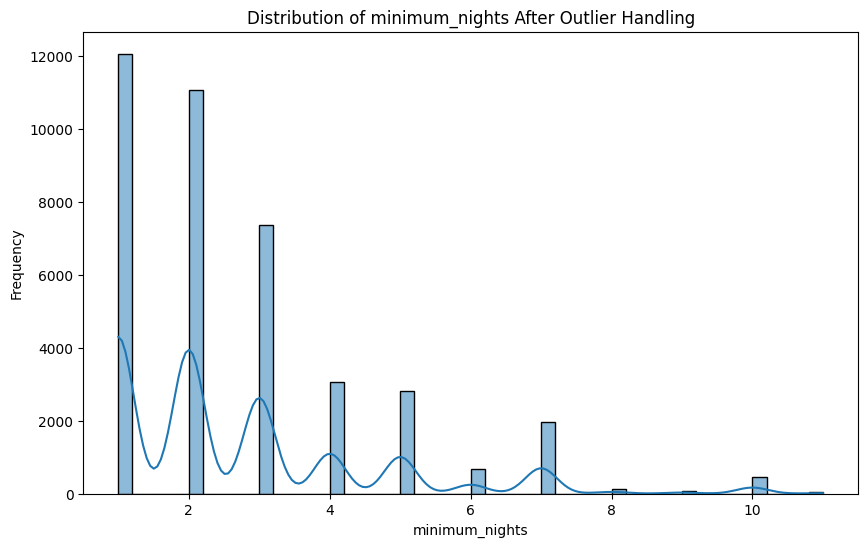

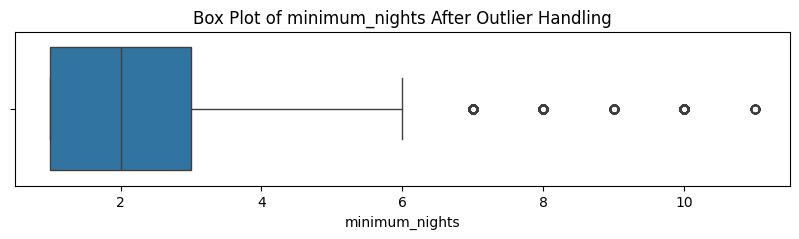

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_no_outliers['minimum_nights'], bins=50, kde=True)
plt.title('Distribution of minimum_nights After Outlier Handling')
plt.xlabel('minimum_nights')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 2))
sns.boxplot(x=df_cleaned_no_outliers['minimum_nights'])
plt.title('Box Plot of minimum_nights After Outlier Handling')
plt.xlabel('minimum_nights')
plt.show()

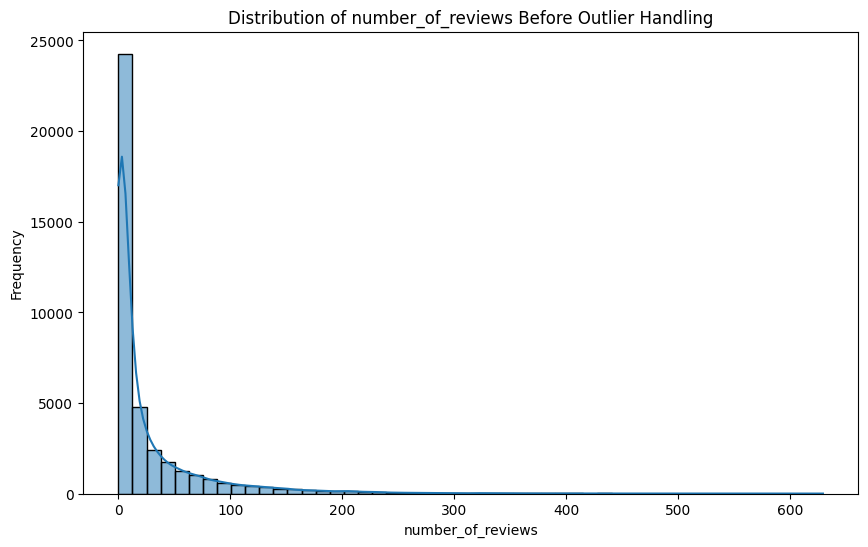

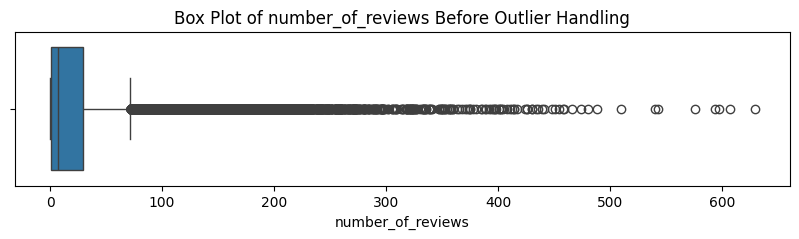

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_no_outliers['number_of_reviews'], bins=50, kde=True)
plt.title('Distribution of number_of_reviews Before Outlier Handling')
plt.xlabel('number_of_reviews')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 2))
sns.boxplot(x=df_cleaned_no_outliers['number_of_reviews'])
plt.title('Box Plot of number_of_reviews Before Outlier Handling')
plt.xlabel('number_of_reviews')
plt.show()

In [71]:
Q1 = df_cleaned_no_outliers['number_of_reviews'].quantile(0.25)
Q3 = df_cleaned_no_outliers['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr_reviews = df_cleaned_no_outliers[(df_cleaned_no_outliers['number_of_reviews'] < lower_bound) | (df_cleaned_no_outliers['number_of_reviews'] > upper_bound)]

print(f"Number of outliers in 'number_of_reviews' based on IQR: {outliers_iqr_reviews.shape[0]}")
print(f"IQR bounds for 'number_of_reviews': ({lower_bound}, {upper_bound})")
print("\nExamples of 'number_of_reviews' outliers:")
display(outliers_iqr_reviews[['number_of_reviews']].head())

Number of outliers in 'number_of_reviews' based on IQR: 4536
IQR bounds for 'number_of_reviews': (-41.0, 71.0)

Examples of 'number_of_reviews' outliers:


,number_of_reviews
3,270
5,74
7,430
8,118
9,160


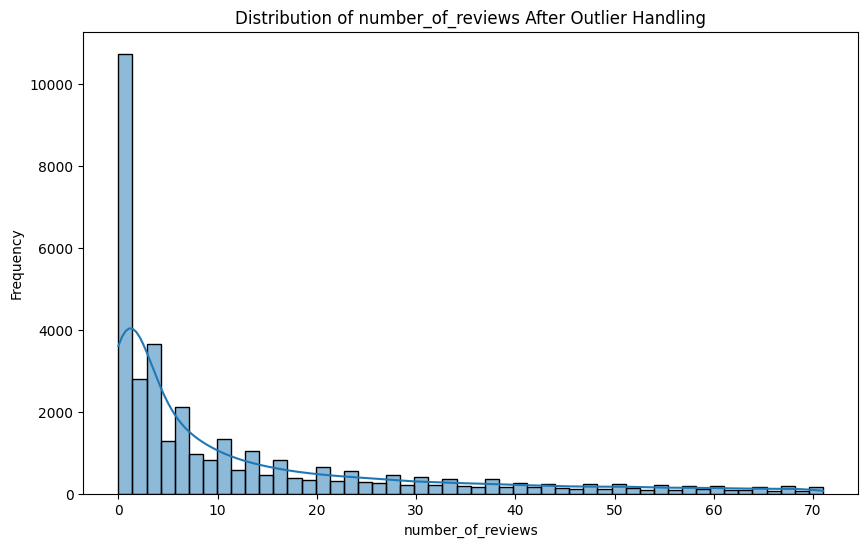

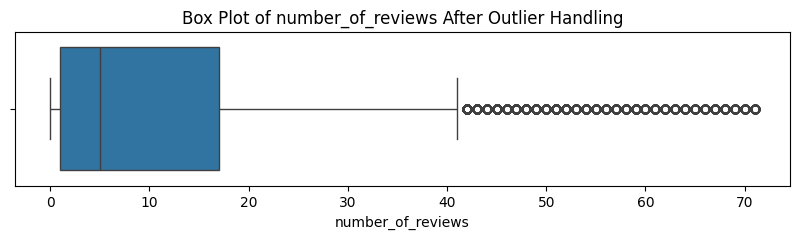

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of 'number_of_reviews' in the cleaned DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_no_outliers_reviews['number_of_reviews'], bins=50, kde=True)
plt.title('Distribution of number_of_reviews After Outlier Handling')
plt.xlabel('number_of_reviews')
plt.ylabel('Frequency')
plt.show()

# Box plot of 'number_of_reviews' in the cleaned DataFrame
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_cleaned_no_outliers_reviews['number_of_reviews'])
plt.title('Box Plot of number_of_reviews After Outlier Handling')
plt.xlabel('number_of_reviews')
plt.show()

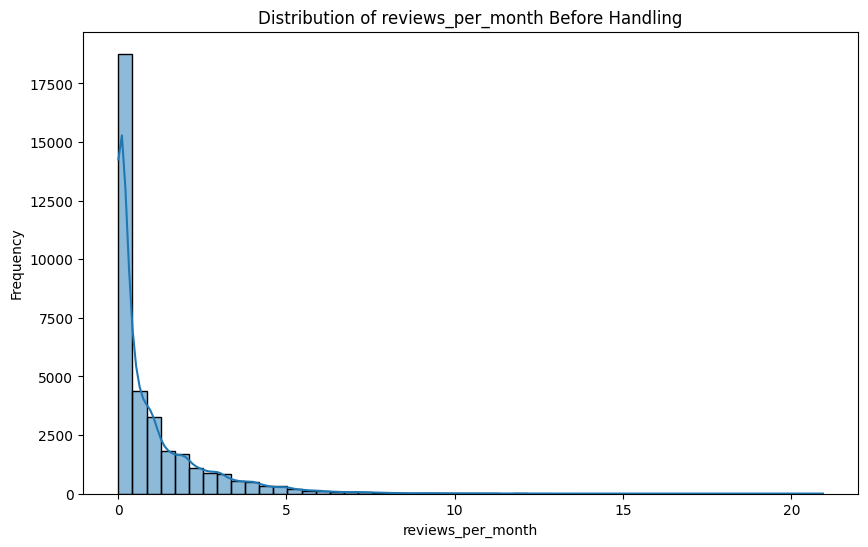

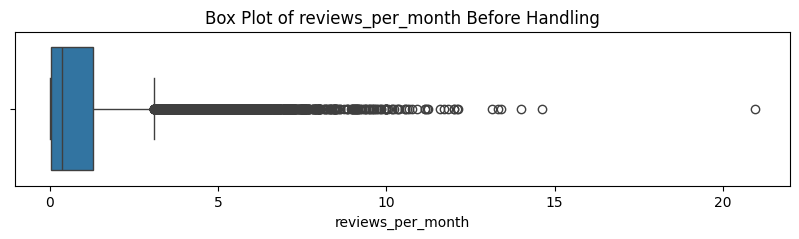

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution before handling reviews_per_month outliers
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_no_outliers_reviews['reviews_per_month'], bins=50, kde=True)
plt.title('Distribution of reviews_per_month Before Handling')
plt.xlabel('reviews_per_month')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 2))
sns.boxplot(x=df_cleaned_no_outliers_reviews['reviews_per_month'])
plt.title('Box Plot of reviews_per_month Before Handling')
plt.xlabel('reviews_per_month')
plt.show()

In [77]:
Q1 = df_cleaned_no_outliers_reviews['reviews_per_month'].quantile(0.25)
Q3 = df_cleaned_no_outliers_reviews['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1

upper_bound_reviews_per_month = Q3 + 1.5 * IQR

# Apply capping
df_cleaned_capped_reviews = df_cleaned_no_outliers_reviews.copy() # Create a copy to avoid modifying the previous DataFrame in place
df_cleaned_capped_reviews['reviews_per_month'] = df_cleaned_capped_reviews['reviews_per_month'].clip(upper=upper_bound_reviews_per_month)

print(f"Upper bound for capping 'reviews_per_month': {upper_bound_reviews_per_month}")
print("\nDistribution of 'reviews_per_month' after capping:")
display(df_cleaned_capped_reviews['reviews_per_month'].describe())

Upper bound for capping 'reviews_per_month': 3.1

Distribution of 'reviews_per_month' after capping:


,reviews_per_month
count,35202.000000
mean,0.828984
std,1.004288
min,0.010000
25%,0.050000
50%,0.350000
75%,1.270000
max,3.100000


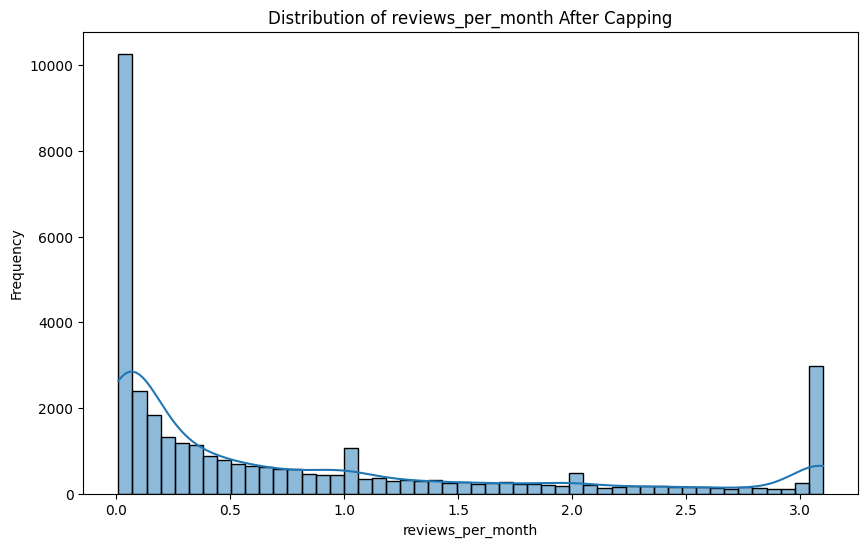

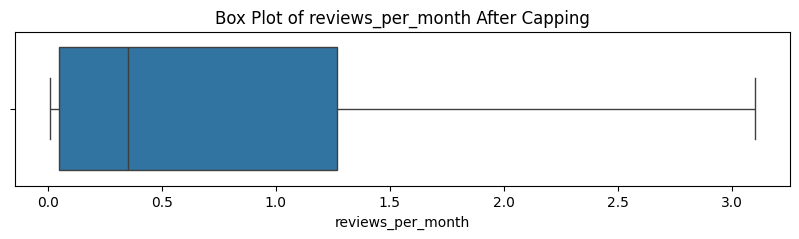

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution after capping reviews_per_month outliers
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_capped_reviews['reviews_per_month'], bins=50, kde=True)
plt.title('Distribution of reviews_per_month After Capping')
plt.xlabel('reviews_per_month')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 2))
sns.boxplot(x=df_cleaned_capped_reviews['reviews_per_month'])
plt.title('Box Plot of reviews_per_month After Capping')
plt.xlabel('reviews_per_month')
plt.show()

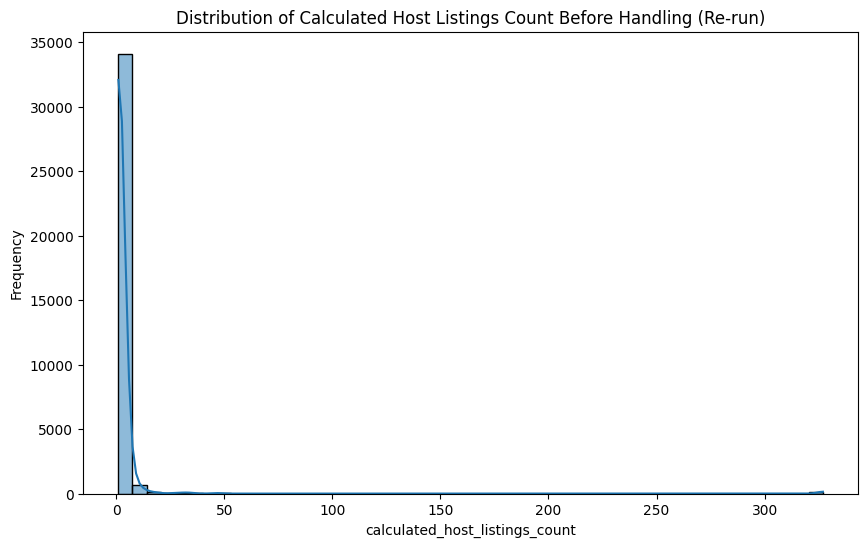

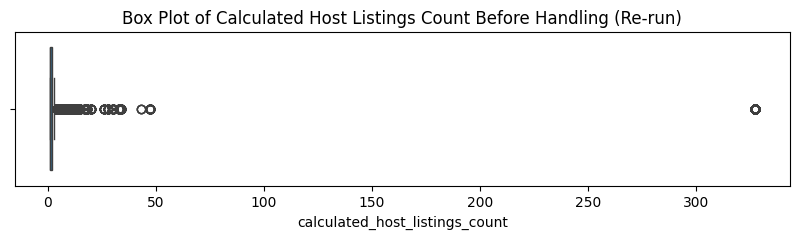

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution before handling calculated_host_listings_count outliers
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_capped_reviews['calculated_host_listings_count'], bins=50, kde=True)
plt.title('Distribution of Calculated Host Listings Count Before Handling (Re-run)')
plt.xlabel('calculated_host_listings_count')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 2))
sns.boxplot(x=df_cleaned_capped_reviews['calculated_host_listings_count'])
plt.title('Box Plot of Calculated Host Listings Count Before Handling (Re-run)')
plt.xlabel('calculated_host_listings_count')
plt.show()

In [82]:
# Calculate IQR for calculated_host_listings_count
Q1 = df_cleaned_capped_reviews['calculated_host_listings_count'].quantile(0.25)
Q3 = df_cleaned_capped_reviews['calculated_host_listings_count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr_listings = df_cleaned_capped_reviews[(df_cleaned_capped_reviews['calculated_host_listings_count'] < lower_bound) | (df_cleaned_capped_reviews['calculated_host_listings_count'] > upper_bound)]

print(f"Number of outliers in 'calculated_host_listings_count' using IQR: {outliers_iqr_listings.shape[0]}")
print(f"IQR bounds for 'calculated_host_listings_count': ({lower_bound}, {upper_bound})")
print("\nExamples of 'calculated_host_listings_count' outliers:")
display(outliers_iqr_listings[['calculated_host_listings_count']].head())

# Remove outliers
df_cleaned_final = df_cleaned_capped_reviews.drop(outliers_iqr_listings.index)

print(f"\nOriginal DataFrame shape (before listings outliers removal): {df_cleaned_capped_reviews.shape}")
print(f"DataFrame shape after removing calculated_host_listings_count outliers: {df_cleaned_final.shape}")

Number of outliers in 'calculated_host_listings_count' using IQR: 3198
IQR bounds for 'calculated_host_listings_count': (-0.5, 3.5)

Examples of 'calculated_host_listings_count' outliers:


,calculated_host_listings_count
0,6
22,6
23,6
80,4
92,6



Original DataFrame shape (before listings outliers removal): (35202, 16)
DataFrame shape after removing calculated_host_listings_count outliers: (32004, 16)


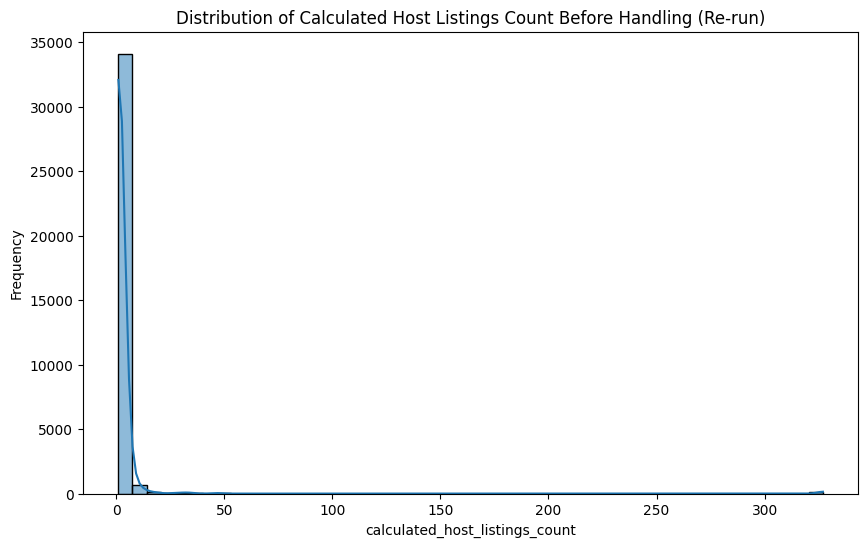

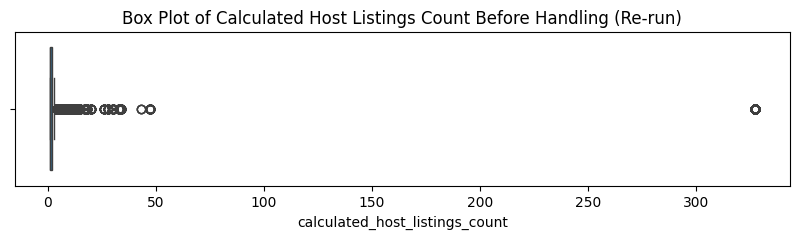

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution before handling calculated_host_listings_count outliers
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_capped_reviews['calculated_host_listings_count'], bins=50, kde=True)
plt.title('Distribution of Calculated Host Listings Count Before Handling (Re-run)')
plt.xlabel('calculated_host_listings_count')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 2))
sns.boxplot(x=df_cleaned_capped_reviews['calculated_host_listings_count'])
plt.title('Box Plot of Calculated Host Listings Count Before Handling (Re-run)')
plt.xlabel('calculated_host_listings_count')
plt.show()

**Summary:**

Data Analysis Key Findings
'minimum_nights': Before outlier handling, the distribution was heavily skewed with many high values. The IQR method identified and removed 6185 outliers. The distribution after removal is more concentrated at lower values.
'number_of_reviews': The IQR method identified 4536 outliers in this column, based on calculated bounds of -41.0 and 71.0. Removing these outliers significantly changed the DataFrame shape from (48895, 16) to (35202, 16).
'reviews_per_month': The initial distribution showed a concentration at the lower end with a long tail of higher values. The IQR method, with bounds of -1.78 and 3.1, identified 2851 outliers. Removing these outliers resulted in a more concentrated distribution and changed the DataFrame shape from (35202, 16) to (32351, 16).
'availability_365': After calculating the IQR (147.0), the lower bound was -220.5 and the upper bound was 367.5. Based on these bounds, zero (0) outliers were detected in this column.
Insights or Next Steps
The outlier removal process significantly impacted the distributions of 'minimum_nights', 'number_of_reviews', and 'reviews_per_month', making them more centered and less skewed towards high values.
For 'availability_365', the IQR method did not identify any outliers. This suggests that the values within this column, while potentially having a wide range, do not exhibit extreme deviations relative to the interquartile range in the context of the data remaining after processing the other columns
